In [1]:
import pandas as pd
import numpy as np


# time

import os
import sys
import time
from datetime import datetime
from datetime import date

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

# Labelizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize


# Normalize 

from sklearn.preprocessing import MinMaxScaler

from sklearn.multiclass import OneVsRestClassifier

# Boosting classifiers


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Save model
import pickle
import joblib


In [2]:
# dynamic path location

# running = 'movies'
# fileName = 'data1_Data_Movies'
# fileName = 'data2_Movies_WithAwards'
# fileName = 'data3_USA_Movies_WithAwards'

running = 'directors'
# fileName = '1_Director_Data_Mar-21-2020'
fileName = '2_Director_Data_Enhanced_May-10-2020'
# fileName = '3_USA_Director_Specific_dataset_May-15-2020'


DataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\'+ fileName +'.csv')


# moviesDataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\.csv')
# moviesDataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\.csv')
# moviesDataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\.csv')



saveFileToPath = "C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\"

data = pd.read_csv(DataFileLocation)


# Notebook Run Settings

chosen_feature_predicting : rating_count , rating_value , review_count_critic , review_count_user , metascore
<br>chosen_bin_method : quartiles , bin_cut , Bin_AsPaper
<br>chosen_success_class : movie_rating , director_rating
<br>chosen_dataset_balance : unbalanced , balanced
<br>chosen_scaling_method : MinMaxScaler , None

In [3]:
if (running == 'directors'):
    
    chosen_feature_predicting = 'Gender'
    chosen_dataset_ratio = 'balanced'
    chosen_scaling_method = 'None'
    default_learning_rate = 0.1
    chosen_max_leaf_nodes = 32
    default_max_depth = 3
    chosen_max_features = None
    chosen_random_state = 42
    
    
elif(running == 'movies'):
    
    chosen_feature_predicting = 'Gender'
    chosen_dataset_ratio = 'unbalanced'
    chosen_scaling_method = 'None'
    default_learning_rate = 0.1
    chosen_max_leaf_nodes = 32
    default_max_depth = 3
    chosen_max_features = None
    chosen_random_state = 42

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   director_ids                                1651 non-null   object 
 1   director_name                               1651 non-null   object 
 2   average_rating_value                        1651 non-null   float64
 3   average_rating_count                        1651 non-null   float64
 4   movies_produced                             1651 non-null   int64  
 5   career_Length                               1651 non-null   int64  
 6   CareerStartYear                             1651 non-null   int64  
 7   Gender                                      1651 non-null   object 
 8   birthYear                                   1651 non-null   int64  
 9   median_inter_event_time                     1651 non-null   float64
 10  average_inte

In [5]:
# Generic function to equally max split the dataframe with respect to the column Name, in our case the Gender column.

def max_equal_split_on_columnName(df,columnName='Gender'):
    df1 = pd.DataFrame()
    for i in df[columnName].value_counts().index:
        df1 = df1.append(df[(df[columnName]==i)]
                         .sample(n=df[columnName]
                                 .value_counts()
                                 .values.min(),
                                 replace = False,
                                random_state = chosen_random_state)
                        )        
    return df1.reset_index(drop=True)

### Balance data

In [6]:
balanced_data = max_equal_split_on_columnName(data)

In [7]:
# Unique director distribution in max_equal DF
print("Unique director distribution - Unbalanced data split based on Gender")

data.drop_duplicates(subset = 'director_ids', keep = 'first').Gender.value_counts()

Unique director distribution - Unbalanced data split based on Gender


Male      1378
Female     273
Name: Gender, dtype: int64

In [8]:
data[chosen_feature_predicting].value_counts()

Male      1378
Female     273
Name: Gender, dtype: int64

In [9]:
data.columns.values

array(['director_ids', 'director_name', 'average_rating_value',
       'average_rating_count', 'movies_produced', 'career_Length',
       'CareerStartYear', 'Gender', 'birthYear',
       'median_inter_event_time', 'average_inter_event_time',
       'total_review_count_user', 'total_review_count_critic',
       'total_metascore', 'median_metascore', 'total_awards_won',
       'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'budget_cur_AUD', 'budget_cur_CAD',
       'budget_cur_EUR', 'budget_cur_GBP', 'budget_cur_INR',
       'budget_cur_USD', 'average_runtime_of_movie', 'total_genre_Action',
       'total_genre_Adult', 'total_genre_Adventure',
       'total_genre_Animation', 'total_genre_Biography',
       'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama',
       'total_genre_Family', 'total_genre_Fantasy',
       'total_genre_Film_Noir', 'total_genre_Game_Show',
       'total_genre_History', 'total_genre_Horror'

In [10]:
data.shape

(1651, 64)

In [11]:
# Unique director distribution in max_equal DF
print("Unique director distribution - Balanced data split based on Gender")

balanced_data.drop_duplicates(subset = 'director_ids', keep = 'first').Gender.value_counts()

Unique director distribution - Balanced data split based on Gender


Male      273
Female    273
Name: Gender, dtype: int64

In [12]:
balanced_data[chosen_feature_predicting].value_counts()

Male      273
Female    273
Name: Gender, dtype: int64

In [13]:
balanced_data.columns.values

array(['director_ids', 'director_name', 'average_rating_value',
       'average_rating_count', 'movies_produced', 'career_Length',
       'CareerStartYear', 'Gender', 'birthYear',
       'median_inter_event_time', 'average_inter_event_time',
       'total_review_count_user', 'total_review_count_critic',
       'total_metascore', 'median_metascore', 'total_awards_won',
       'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'budget_cur_AUD', 'budget_cur_CAD',
       'budget_cur_EUR', 'budget_cur_GBP', 'budget_cur_INR',
       'budget_cur_USD', 'average_runtime_of_movie', 'total_genre_Action',
       'total_genre_Adult', 'total_genre_Adventure',
       'total_genre_Animation', 'total_genre_Biography',
       'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama',
       'total_genre_Family', 'total_genre_Fantasy',
       'total_genre_Film_Noir', 'total_genre_Game_Show',
       'total_genre_History', 'total_genre_Horror'

In [14]:
balanced_data.shape

(546, 64)

In [15]:
def print_feature_importances(coef, names, top=-1):
    whole = []
    imp = coef
    imp,names = zip(*sorted(list(zip(imp, names)),reverse=True))
    for i in range(len(names)):
        string = "{} :: {}".format(str(names[i]),str(round(imp[i],3)))
        whole.append(string)
    return whole

### Choosing dataset for the analysis

In [16]:
chosen_dataset_ratio

'balanced'

In [17]:
chosen_dataframe = ''
if(chosen_dataset_ratio == 'unbalanced'):
    chosen_dataframe = data
elif(chosen_dataset_ratio == 'balanced'):
    chosen_dataframe = balanced_data

### Remove Features from dataset which are not required

In [18]:
object_features_to_remove = chosen_dataframe.select_dtypes(include = 'object').columns.values.tolist()
object_features_to_remove.remove('Gender')
object_features_to_remove

['director_ids', 'director_name']

### Drop features from Chosen Dataset

In [19]:
print('The shape of our Chosen Director dataset before removing object type features:', chosen_dataframe.shape)
# movies_data = movies_data[movies_data.columns.difference(object_features_to_remove)]
chosen_dataframe = chosen_dataframe.drop(columns= object_features_to_remove)
print('The shape of our Chosen Director dataset after dropping object type features:', chosen_dataframe.shape)

The shape of our Chosen Director dataset before removing object type features: (546, 64)
The shape of our Chosen Director dataset after dropping object type features: (546, 62)


# Observations

In [20]:
def one_hot_encode_gender(df,one_hot_feature = 'Gender'):
    print('Before one hot encoding , Shape ;', df.shape)
    # one hot encoding of Gender
    df = pd.concat([df, pd.get_dummies(df[one_hot_feature],prefix= one_hot_feature,dtype = int)],axis=1)
    df.drop([one_hot_feature],axis=1, inplace=True)
    print('After one hot encoding , Shape ;', df.shape)
    df.head(2)
    return df

In [21]:
# Function to Plot - Distribution of rating value among male and female. 

def plot_features_WRT_gender(df,columnCriteriaName,columnFeatureName):
    dict={}
    for i in df[columnCriteriaName].value_counts().index:
        dict["{0}_{1}".format(columnFeatureName,i)] = df[(df[columnCriteriaName] == i)][columnFeatureName]
    for k,v in dict.items():
        sns.distplot(v,label=[k])
        plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)

In [22]:
numericalGender = {"Male": 1, "Female": 0 }
chosen_dataframe.Gender.replace(numericalGender,inplace=True)

# director_data.Gender.replace(numericalGender,inplace=True)
# balanced_director_data.Gender.replace(numericalGender,inplace=True)

In [23]:
chosen_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   average_rating_value                        546 non-null    float64
 1   average_rating_count                        546 non-null    float64
 2   movies_produced                             546 non-null    int64  
 3   career_Length                               546 non-null    int64  
 4   CareerStartYear                             546 non-null    int64  
 5   Gender                                      546 non-null    int64  
 6   birthYear                                   546 non-null    int64  
 7   median_inter_event_time                     546 non-null    float64
 8   average_inter_event_time                    546 non-null    float64
 9   total_review_count_user                     546 non-null    int64  
 10  total_review_c

In [24]:
chosen_dataframe.Gender.value_counts()

1    273
0    273
Name: Gender, dtype: int64

In [25]:
chosen_dataframe.head()

,average_rating_value,average_rating_count,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,average_inter_event_time,total_review_count_user,...,total_genre_Western,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,average_movie_per_year,num_countries_screened,num_genres_directed,num_languages_released
0,7.23,178518.0,3,21,1993,1,1953,4.5,4.5,1947,...,0,0,0,0,4,7.85,0.14,1,4,5
1,6.30,31281.0,2,41,1964,1,1936,4.0,4.0,489,...,0,0,1,0,8,7.80,0.05,1,5,4
2,8.10,97648.0,1,18,1997,1,1975,0.0,0.0,139,...,0,0,1,0,4,7.95,0.06,1,3,1
3,7.52,291358.5,6,33,1984,1,1963,1.0,1.8,4117,...,0,1,0,0,8,7.38,0.18,1,7,1
4,6.60,12178.0,1,15,1991,1,1956,0.0,0.0,80,...,0,1,0,0,8,6.92,0.07,1,3,1


## Divide the data to training and testing - Scaling methods too

Check about the Scaling

In [26]:
def divide_test_train_with_scaling_methods(df,predict= chosen_feature_predicting,scalingMethod = "MinMaxScaler"):
        
    # Feature matrix and target variable
    X = df.drop(predict,axis = 'columns')
    y = df[predict]
    
#     lb = preprocessing.LabelBinarizer()
#     y = lb.fit_transform(y)
    
    # Scaling
    if (scalingMethod == "MinMaxScaler"):
        print("The scaling method used is : ",scalingMethod)
        scaler = MinMaxScaler()
        new_X = scaler.fit_transform(X)
        # X_test = scaler.transform(X_test)
        
    else:
        print("No Scaling Method used or incorrect input")
        new_X = X
    
    # Divide the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.20, random_state = 42 , stratify = y )
    
    return X_train, X_test, y_train, y_test

In [27]:
# Divide the data into training and test

X_train, X_test, y_train, y_test = divide_test_train_with_scaling_methods(chosen_dataframe,scalingMethod= chosen_scaling_method)

No Scaling Method used or incorrect input


In [28]:
X_train.shape , y_train.shape

((436, 61), (436,))

In [29]:
X_test.shape , y_test.shape

((110, 61), (110,))

# Plot Confusion Matrix

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('ConfusionMatrix_.png', dpi=100, bbox_inches='tight')



### Function for Run Info :

In [31]:
def run_info(classifier):
    print('\n**Run Info - ' + classifier + '**')
    print('Dataset Shape :', chosen_dataframe.shape)
    print('Dataset ratio of classes is', chosen_dataset_ratio)
    print('Predicting feature :', chosen_feature_predicting)
    print('Scaling Method :', chosen_scaling_method)
    print('Learning Rate :',default_learning_rate)
    print('****************\n')
    return

### Function to print customized classification report

In [32]:
def customized_classification_report(y_true,y_pred, AUCROC ):
    
    cols_to_use_classification_report = ['Female','Male','accuracy']
    
    reportGBClassification = classification_report(y_true,
                                               y_pred,
                                               output_dict=True)

    reportDF = pd.DataFrame(reportGBClassification)[0:3]
    reportDF = reportDF[['0','1','accuracy']]


    reportDF[['0','1']] = reportDF[['0','1']].round(2)
    accuracyRow = reportDF['accuracy'].unique().tolist()

    reportDF.drop(columns='accuracy',inplace= True)

    reportDF.loc[len(reportDF)] = 2 * accuracyRow
    reportDF.loc[len(reportDF)] = 2 * [AUCROC]

    reportDF = reportDF.rename(index = {3:'accuracy',4:'AUC ROC'})
    return reportDF

# Boosting Classifiers

### 1.  Gradient Boosting Classifier

#### 1a) Identify the optimal Learning rate

In [33]:
# optimal_learning_rate = learningRateDF['learning_rate'].loc[learningRateDF.
#                                                                 mask((learningRateDF == learningRateDF.min())
#                                                                      .cumsum()
#                                                                      .astype(bool))
#                                                                 [::-1]
#                                                                 .idxmax()
#                                                                 ['testing_accuracy']]

In [34]:
def optimal_learning_rate(X_train, X_test, y_train, y_test):
    
    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

    col_learningDF = ['learning_rate','training_accuracy','testing_accuracy']
    learningRateDF = pd.DataFrame(columns=col_learningDF)

    for learning_rate in lr_list:

        gb_clf = GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=learning_rate,
#                                             max_leaf_nodes= 32,
#                                             max_features=2,
#                                             max_depth=2,
                                            random_state= 42 )
        gb_clf.fit(X_train, y_train)

        accuracy_train_score = gb_clf.score(X_train, y_train)
        accuracy_test_score = gb_clf.score(X_test, y_test)

        learningRateDF.loc[len(learningRateDF)] = [learning_rate,accuracy_train_score,accuracy_test_score]
#         print("Learning rate: ", learning_rate)
#         print("Accuracy score (training): {0:.3f}".format(accuracy_train_score))
#         print("Accuracy score (test): {0:.3f}".format(accuracy_test_score))
    print(learningRateDF)

    optimal_learning_rate = learningRateDF['learning_rate'].loc[learningRateDF.testing_accuracy.argmax()]

# # Script to find the maximum learning_rate where the test_accuracy is maximum

#     optimal_learning_rate = learningRateDF['learning_rate'].loc[((learningRateDF == learningRateDF.min())
#                                                                  .cumsum()
#                                                                  .astype(bool))
#                                                                 [::-1].idxmax()
#                                                                 ['testing_accuracy']
#                                                                ]

    return optimal_learning_rate

In [35]:
# chosen_learning_rate_GB = optimal_learning_rate(X_train, X_test, y_train, y_test)
chosen_learning_rate_GB = default_learning_rate
print("\nThe optimal learning rate for GB Classifier is :",chosen_learning_rate_GB)


The optimal learning rate for GB Classifier is : 0.1


#### 1b) Model Function

In [36]:
def train_model_Gradient_Boosting_classifier(X_train, X_test, y_train, y_test,learning_rate = 1):
    
    start = time.time()
    print("Started Reading files at :" + str(datetime.utcfromtimestamp(start).strftime('%Y-%m-%d %H:%M:%S')))
    
    labelClass = [0,1]

    # Classifier parameters    
    gb_clf = GradientBoostingClassifier(n_estimators=100,
                                         learning_rate= default_learning_rate,
                                         max_leaf_nodes= chosen_max_leaf_nodes,
                                         max_features= chosen_max_features,
                                         max_depth= default_max_depth,
                                         random_state= chosen_random_state
                                        )
    
    gb_clf.fit(X_train, y_train)
    
    # Predict classes
    y_pred = gb_clf.predict(X_test)
    y_prob = gb_clf.predict_proba(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_pred,labels= labelClass )
#     np.set_printoptions(precision=2)
    
    classifier_name = gb_clf.__class__.__name__
    train_size = int(round((len(X_train) / len(chosen_dataframe)),1) * 100)
    test_size = int(round((len(X_test) / len(chosen_dataframe)),1) * 100)
    
    # Print run info
    run_info(classifier_name)
    
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes= labelClass,
                      title='Confusion matrix, without normalization')
    
    
    gb_train_score = gb_clf.score(X_train, y_train)
    print("\nTraining Score of {0} on {2} % data : {1} ".format(classifier_name,round(gb_train_score,3),train_size))
    
    gb_test_score = gb_clf.score(X_test, y_test)
    print("Testing Score of {0} on {2} % data : {1} ".format(classifier_name,round(gb_test_score,3),test_size))
    
    # Performance metrics
    
    auc_roc = roc_auc_score(y_test, y_pred , average = 'macro')
    print( "\nArea Under the Curve - ROC (Macro) : ",round(auc_roc,3))
    print( "Matthews_corrcoef : ", round(metrics.matthews_corrcoef(y_test, y_pred),3))

#     print("\nConfusion Matrix:\n")
#     print(cnf_matrix)

    print("\nClassification Report\n")
#     print(classification_report(y_test, y_pred))
    print(classification_report(y_test, y_pred, labels = labelClass ))
        
    # Stop timer
    end = time.time()
    print("\nStopped Reading files at :" + str(datetime.utcfromtimestamp(end).strftime('%Y-%m-%d %H:%M:%S')))
    total_time = str(round((end - start)/60,2))
    print("Total time taken in minutes: " + str((end - start)/60))
      
    return gb_clf,y_test,y_pred,auc_roc

#### 1c) Run Results of Gradient Boosting Model

Started Reading files at :2020-05-29 17:11:21

**Run Info - GradientBoostingClassifier**
Dataset Shape : (546, 62)
Dataset ratio of classes is balanced
Predicting feature : Gender
Scaling Method : None
Learning Rate : 0.1
****************

Confusion matrix, without normalization
[[25 30]
 [26 29]]

Training Score of GradientBoostingClassifier on 80 % data : 0.95 
Testing Score of GradientBoostingClassifier on 20 % data : 0.491 

Area Under the Curve - ROC (Macro) :  0.491
Matthews_corrcoef :  -0.018

Classification Report

              precision    recall  f1-score   support

           0       0.49      0.45      0.47        55
           1       0.49      0.53      0.51        55

    accuracy                           0.49       110
   macro avg       0.49      0.49      0.49       110
weighted avg       0.49      0.49      0.49       110


Stopped Reading files at :2020-05-29 17:11:21
Total time taken in minutes: 0.007399904727935791


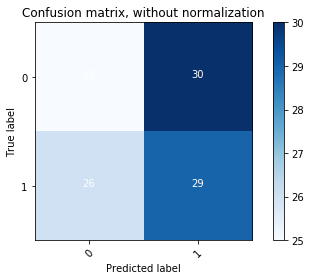

In [37]:
gb_clf, y_true , y_pred, AUCROC = train_model_Gradient_Boosting_classifier(X_train, X_test, y_train, y_test,learning_rate = chosen_learning_rate_GB)
# tn, fp, fn, tp


In [38]:
GB_reportDF = customized_classification_report(y_true,y_pred,AUCROC)
GB_reportDF[['1','0']]

,1,0
precision,0.490000,0.490000
recall,0.530000,0.450000
f1-score,0.510000,0.470000
accuracy,0.490909,0.490909
AUC ROC,0.490909,0.490909


precision	0.530000	0.540000
recall	0.490000	0.580000
f1-score	0.510000	0.560000
accuracy	0.535211	0.535211
AUC ROC	0.534524	0.534524

In [39]:
# gb_clf2 = GradientBoostingClassifier(n_estimators=100,
#                                          learning_rate=0.1,
#                                          max_leaf_nodes = 32,
# #                                          max_features=2,
# #                                          max_depth=2,
# #                                          random_state= 42
#                                         )
# gb_clf2.fit(X_train, y_train)
# predictions = gb_clf2.predict(X_test)

# gb_train_score = gb_clf2.score(X_train, y_train)
# print("Training Score of Gradient Boosting Classifier: ",round(gb_train_score,3))

# gb_test_score = gb_clf2.score(X_test, y_test)
# print("Testing Score of Gradient Boosting Classifier : ",round(gb_test_score,3))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, predictions))

# print("\nClassification Report")
# print(classification_report(y_test, predictions))


### Train accuracy of the model

In [40]:
gb_clf.feature_importances_

array([5.09333206e-02, 8.36784496e-02, 8.53268914e-05, 3.93842010e-02,
       6.45370043e-02, 3.07003558e-02, 1.00314542e-02, 4.71922880e-03,
       3.63369449e-02, 4.29023193e-02, 4.65500038e-02, 7.44199323e-02,
       0.00000000e+00, 1.60430337e-02, 7.32880310e-02, 4.77356736e-02,
       1.01284571e-02, 5.64315298e-03, 4.06938122e-03, 0.00000000e+00,
       0.00000000e+00, 3.61503364e-03, 5.50400442e-02, 5.39527154e-04,
       0.00000000e+00, 1.83039087e-02, 0.00000000e+00, 7.40150249e-03,
       5.57901963e-03, 2.36092304e-03, 2.13764181e-03, 2.82864243e-02,
       1.55644353e-02, 2.29364202e-04, 0.00000000e+00, 0.00000000e+00,
       3.33060869e-03, 7.94174824e-03, 1.15124668e-03, 3.02251577e-04,
       2.66594224e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.36530173e-03, 3.66270831e-03, 0.00000000e+00, 5.57423192e-03,
       0.00000000e+00, 3.95549992e-02, 3.10034338e-03, 0.00000000e+00,
       2.66679487e-03, 1.09823235e-02, 1.62985596e-03, 2.64488814e-02,
      

In [41]:
gb_clf.train_score_

array([1.35947554, 1.33140602, 1.31086348, 1.28680634, 1.26844896,
       1.25135015, 1.23460866, 1.2171895 , 1.20506898, 1.19104663,
       1.17910259, 1.17012377, 1.15909337, 1.14804772, 1.13960986,
       1.13135416, 1.11850408, 1.10831004, 1.10414988, 1.09884924,
       1.08651646, 1.07808363, 1.06740859, 1.05848333, 1.05273255,
       1.0451974 , 1.04054716, 1.03721618, 1.02988904, 1.02634816,
       1.0189952 , 1.01408634, 1.01098463, 1.00344788, 0.9972108 ,
       0.98447973, 0.98129152, 0.97545378, 0.96562062, 0.95699426,
       0.95298951, 0.95031342, 0.94390722, 0.93650392, 0.93062989,
       0.92849719, 0.92601273, 0.92227492, 0.91789689, 0.91027475,
       0.90051493, 0.89413881, 0.89134763, 0.88533019, 0.87319526,
       0.86795279, 0.86320365, 0.85898283, 0.85254268, 0.84573444,
       0.84055649, 0.83778371, 0.83026441, 0.82453762, 0.81883753,
       0.81357262, 0.80953542, 0.80648769, 0.80174397, 0.80011803,
       0.79642531, 0.79179205, 0.78883579, 0.78100542, 0.77931

In [42]:
labelClass = [0,1]
y_train_pred = gb_clf.predict(X_train)
y_train_prob = gb_clf.predict_proba(X_train)
auc_roc = roc_auc_score(y_test, y_pred)


In [43]:
train_GB_reportDF = customized_classification_report(y_train,y_train_pred,auc_roc)
train_GB_reportDF

,0,1
precision,0.970000,0.930000
recall,0.930000,0.970000
f1-score,0.950000,0.950000
accuracy,0.949541,0.949541
AUC ROC,0.490909,0.490909


### 1e) Plot ROC AUC Curve

In [44]:
def divide_test_train_with_scaling_methods_roc_auc(df,predict= chosen_feature_predicting,scalingMethod = "MinMaxScaler"):
    
    labelClass = [0,1]
    
    # Feature matrix and target variable
    X = df.drop(predict,axis = 'columns')
    y = df[[predict]]
    y = one_hot_encode_gender(y)
    
    # Using LabelBinarizer
#     lb = preprocessing.LabelBinarizer()
#     y = lb.fit_transform(y)

    # Using label_binarize
    y = label_binarize(y, classes= labelClass)

    
    # Scaling
    if (scalingMethod == "MinMaxScaler"):
        print("The scaling method used is : ",scalingMethod)
        scaler = MinMaxScaler()
        new_X = scaler.fit_transform(X)
        # X_test = scaler.transform(X_test)
        
    else:
        print("No Scaling Method used or incorrect input")
        new_X = X
    
    # Divide the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.20, random_state = 42 , stratify = y )
    
    return X_train, X_test, y_train, y_test

In [45]:
X_train_AUC, X_test_AUC, y_train_AUC, y_test_AUC = divide_test_train_with_scaling_methods_roc_auc(chosen_dataframe,scalingMethod= chosen_scaling_method)

Before one hot encoding , Shape ; (546, 1)
After one hot encoding , Shape ; (546, 2)
No Scaling Method used or incorrect input


In [46]:
X_train_AUC.shape , y_train_AUC.shape

((436, 61), (436, 2))

In [47]:
X_test_AUC.shape , y_test_AUC.shape

((110, 61), (110, 2))

In [48]:
def plot_roc_auc(X_train, X_test, y_train, y_test,learning_rate = 1):
    
    start = time.time()
    print("Started Reading files at :" + str(datetime.utcfromtimestamp(start).strftime('%Y-%m-%d %H:%M:%S')))
    
    labelClass = [0,1]

    # Classifier parameters    
    gb_clf = GradientBoostingClassifier(n_estimators=100,
                                         learning_rate= default_learning_rate,
                                         max_leaf_nodes= chosen_max_leaf_nodes,
                                         max_features= chosen_max_features,
                                         max_depth= default_max_depth,
                                         random_state= chosen_random_state
                                        )
    
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(gb_clf)
    gb_clf = classifier
    
    
#     gb_clf.fit(X_train, y_train)
    y_score = gb_clf.fit(X_train, y_train).decision_function(X_test)

    # Predict classes
    y_pred = gb_clf.predict(X_test)
    y_prob = gb_clf.predict_proba(X_test)
    
    
    classifier_name = gb_clf.__class__.__name__
    train_size = int(round((len(X_train) / len(chosen_dataframe)),1) * 100)
    test_size = int(round((len(X_test) / len(chosen_dataframe)),1) * 100)
    
    # Print run info
    run_info(classifier_name)
    
      
    
    gb_train_score = gb_clf.score(X_train, y_train)
    print("\nTraining Score of {0} on {2} % data : {1} ".format(classifier_name,round(gb_train_score,3),train_size))
    
    gb_test_score = gb_clf.score(X_test, y_test)
    print("Testing Score of {0} on {2} % data : {1} ".format(classifier_name,round(gb_test_score,3),test_size))
    
    # Performance metrics
    
    auc_roc = roc_auc_score(y_test, y_pred)
    print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(auc_roc,3))
#     print("\nConfusion Matrix:\n")
#     print(cnf_matrix)
        
    # Stop timer
    end = time.time()
    print("\nStopped Reading files at :" + str(datetime.utcfromtimestamp(end).strftime('%Y-%m-%d %H:%M:%S')))
    total_time = str(round((end - start)/60,2))
    print("Total time taken in minutes: " + str((end - start)/60))
      
    return gb_clf, y_test , y_pred, y_prob , auc_roc , y_score

In [49]:
ovr_gb_clf, y_true , y_pred_AUC, y_prob , AUCROC , y_score= plot_roc_auc(X_train_AUC, X_test_AUC, y_train_AUC, y_test_AUC,learning_rate = chosen_learning_rate_GB)


Started Reading files at :2020-05-29 17:11:22

**Run Info - OneVsRestClassifier**
Dataset Shape : (546, 62)
Dataset ratio of classes is balanced
Predicting feature : Gender
Scaling Method : None
Learning Rate : 0.1
****************


Training Score of OneVsRestClassifier on 80 % data : 0.954 
Testing Score of OneVsRestClassifier on 20 % data : 0.473 

Area Under the Curve - ROC (OVO , Macro) :  0.473

Stopped Reading files at :2020-05-29 17:11:22
Total time taken in minutes: 0.006935834884643555


## Calculate FPR and TPR

In [50]:
# Compute ROC curve and ROC area for each class
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
thresholds_gb = dict()
for i in range(2):
    fpr_gb[i], tpr_gb[i], thresholds_gb[i] = roc_curve(y_test_AUC[:, i], y_score[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

In [51]:
# Compute micro-average ROC curve and ROC area

fpr_gb["micro"], tpr_gb["micro"], thresholds_gb['micro'] = roc_curve(y_test_AUC.ravel(), y_score.ravel())
roc_auc_gb["micro"] = auc(fpr_gb["micro"], tpr_gb["micro"])

In [52]:
# # To calculate macro avearage

# # first aggregate all the false positive rates
# all_fpr_gb = np.unique(np.concatenate([fpr_gb[i] for i in range(2)]))

# # Then interpolate all ROC curves at this points
# mean_tpr_gb = np.zeros_like(all_fpr_gb)

# for i in range(2):
#     mean_tpr_gb += np.interp(all_fpr_gb ,fpr_gb[i] , tpr_gb[i])

# # Finally average it and compute AUC for macro    
# mean_tpr_gb /= 2


# fpr_gb['macro'] = all_fpr_gb
# tpr_gb['macro'] = mean_tpr_gb
# roc_auc_gb["macro"] = auc(fpr_gb["macro"], tpr_gb["macro"])

### Binary class roc macro calculation

In [53]:
fpr_gb['macro'] , tpr_gb['macro'], _ = roc_curve(y_test, y_pred)
roc_auc_gb["macro"] = roc_auc_score(y_test, y_pred, average = 'macro')

## Plot figure

In [54]:
gb_clf = GradientBoostingClassifier()
figure_name = '.\\DirectorPlots\\PredictGender\\ROC_'+ gb_clf.__class__.__name__ + '_' + chosen_dataset_ratio + '_' + fileName +'.png'

figure_name

'.\\DirectorPlots\\PredictGender\\ROC_GradientBoostingClassifier_balanced_2_Director_Data_Enhanced_May-10-2020.png'

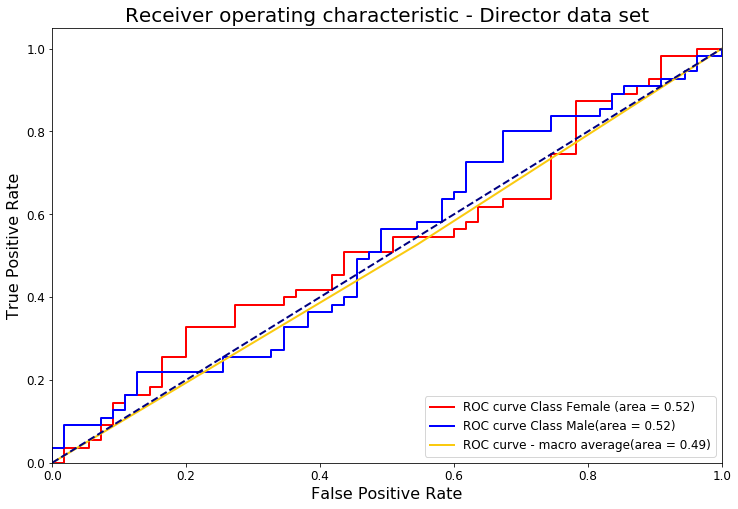

In [55]:
plt.figure(figsize=(12,8))
lw = 2
plt.plot(fpr_gb[0], tpr_gb[0], color='red',
         lw=lw, label='ROC curve Class Female (area = %0.2f)' % roc_auc_gb[0])

plt.plot(fpr_gb[1], tpr_gb[1], color='blue',
         lw=lw, label='ROC curve Class Male(area = %0.2f)' % roc_auc_gb[1])


# plt.plot(fpr_gb['micro'], tpr_gb['micro'], color='orange',
#          lw=lw, label='ROC curve - micro average(area = %0.2f)' % roc_auc_gb['micro'])

plt.plot(fpr_gb['macro'], tpr_gb['macro'], color='#FACA0F',
         lw=lw, label='ROC curve - macro average(area = %0.2f)' % roc_auc_gb['macro'])



plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.title('Receiver operating characteristic - Director data set',fontsize = 20)
plt.legend(loc="lower right",fontsize = 12)
plt.tick_params(labelsize=12)
# plt.savefig(figure_name, dpi=100)
plt.show()

### 2. XGB Classifier

#### 2b) Optimal learning rate

In [56]:
def optimal_learning_rate_xgb(X_train, X_test, y_train, y_test):
    
    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

    col_learningDF = ['learning_rate','training_accuracy','testing_accuracy']
    learningRateDF = pd.DataFrame(columns=col_learningDF)

    for learning_rate in lr_list:

        xgb_clf = XGBClassifier(n_estimators=100,
                                learning_rate=learning_rate,
                                max_features=2,
                                max_depth=2,
                                random_state= 42
                               )
        
        xgb_clf.fit(X_train, y_train)

        accuracy_train_score = xgb_clf.score(X_train, y_train)
        accuracy_test_score = xgb_clf.score(X_test, y_test)

        learningRateDF.loc[len(learningRateDF)] = [learning_rate,accuracy_train_score,accuracy_test_score]
#         print("Learning rate: ", learning_rate)
#         print("Accuracy score (training): {0:.3f}".format(accuracy_train_score))
#         print("Accuracy score (test): {0:.3f}".format(accuracy_test_score))
    print(learningRateDF)

    optimal_learning_rate = learningRateDF['learning_rate'].loc[learningRateDF.testing_accuracy.argmax()]

    return optimal_learning_rate

In [57]:
# chosen_learning_rate_XGB = optimal_learning_rate_xgb(X_train, X_test, y_train, y_test)
chosen_learning_rate_XGB = default_learning_rate
print("\nThe optimal learning rate for XGB Classifier is :",chosen_learning_rate_XGB)


The optimal learning rate for XGB Classifier is : 0.1


#### 2b) Model Function

In [58]:
def train_model_XGB_classifier(X_train, X_test, y_train, y_test,learning_rate = 1):
    
    start = time.time()
    print("Started Reading files at :" + str(datetime.utcfromtimestamp(start).strftime('%Y-%m-%d %H:%M:%S')))
    
    labelClass = [0,1]
    
    # Classifier parameters    

    xgb_clf = XGBClassifier(n_estimators=100,
                            learning_rate=learning_rate,
                            max_leaf_nodes= chosen_max_leaf_nodes,
                            max_features= chosen_max_features,
                            max_depth= default_max_depth,
                            random_state= chosen_random_state
                           )
    
    xgb_clf.fit(X_train, y_train)
    
    # Predict classes
    y_pred = xgb_clf.predict(X_test)
    y_prob = xgb_clf.predict_proba(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_pred,labels= labelClass )
    np.set_printoptions(precision=2)
    
    classifier_name = xgb_clf.__class__.__name__
    train_size = int(round((len(X_train) / len(chosen_dataframe)),1) * 100)
    test_size = int(round((len(X_test) / len(chosen_dataframe)),1) * 100)
    
    # Print run info
    run_info(classifier_name)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes= labelClass,
                      title='Confusion matrix, without normalization')
    
    xgb_train_score = xgb_clf.score(X_train, y_train)
    print("\nTraining Score of {0} on {2} % data : {1} ".format(classifier_name,round(xgb_train_score,3),train_size))
    
    xgb_test_score = xgb_clf.score(X_test, y_test)
    print("\nTraining Score of {0} on {2} % data : {1} ".format(classifier_name,round(xgb_test_score,3),test_size))
    
        
    # Performance metrics
    
    auc_roc = roc_auc_score(y_test, y_pred)
    print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(auc_roc,3))
    print( "Matthews_corrcoef : ", round(metrics.matthews_corrcoef(y_test, y_pred),3))

    print("\nClassification Report\n")
    print(classification_report(y_test, y_pred, labels = labelClass ))
    
    # Stop timer
    end = time.time()
    print("\nStopped Reading files at :" + str(datetime.utcfromtimestamp(end).strftime('%Y-%m-%d %H:%M:%S')))
    total_time = str(round((end - start)/60,2))
    print("Total time taken in minutes: " + str((end - start)/60))
  
    return xgb_clf,y_test,y_pred,auc_roc

###  2c) Run results of XGB Model

Started Reading files at :2020-05-29 17:11:22

**Run Info - XGBClassifier**
Dataset Shape : (546, 62)
Dataset ratio of classes is balanced
Predicting feature : Gender
Scaling Method : None
Learning Rate : 0.1
****************

Confusion matrix, without normalization
[[29 26]
 [29 26]]

Training Score of XGBClassifier on 80 % data : 0.924 

Training Score of XGBClassifier on 20 % data : 0.5 

Area Under the Curve - ROC (OVO , Macro) :  0.5
Matthews_corrcoef :  0.0

Classification Report

              precision    recall  f1-score   support

           0       0.50      0.53      0.51        55
           1       0.50      0.47      0.49        55

    accuracy                           0.50       110
   macro avg       0.50      0.50      0.50       110
weighted avg       0.50      0.50      0.50       110


Stopped Reading files at :2020-05-29 17:11:23
Total time taken in minutes: 0.006375376383463542


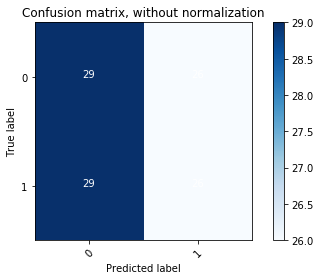

In [59]:
xgb_clf,y_true,y_pred,macro_ovo_roc_auc = train_model_XGB_classifier(X_train, X_test, y_train, y_test,learning_rate = chosen_learning_rate_XGB)
# tn, fp, fn, tp

In [60]:
XGB_reportDF = customized_classification_report(y_true,y_pred,AUCROC)
XGB_reportDF[['1','0']]

,1,0
precision,0.500000,0.500000
recall,0.470000,0.530000
f1-score,0.490000,0.510000
accuracy,0.500000,0.500000
AUC ROC,0.472727,0.472727


In [61]:
GB_reportDF[['1','0']]

,1,0
precision,0.490000,0.490000
recall,0.530000,0.450000
f1-score,0.510000,0.470000
accuracy,0.490909,0.490909
AUC ROC,0.490909,0.490909


In [62]:
def train_model_XGB_classifier(X_train, X_test, y_train, y_test,learning_rate = 1):
    
    # Classifier parameters    

    xgb_clf = XGBClassifier(n_estimators=100,
                            learning_rate=learning_rate,
                            max_features=2,
                            max_depth=2,
                            random_state= 42
                           )
    xgb_clf.fit(X_train, y_train)
    
    xgb_train_score = xgb_clf.score(X_train, y_train)
    print("Training Score : ",round(xgb_train_score,3))
    
    xgb_test_score = xgb_clf.score(X_test, y_test)
    print("Testing Score : ",round(xgb_test_score,3))
    
    predictions = xgb_clf.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    return xgb_clf

# End